In [1]:
import kwant
import openfermion
from kwant_to_openfermion import *

C:\Users\Repair\anaconda3\lib\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


Simple system:

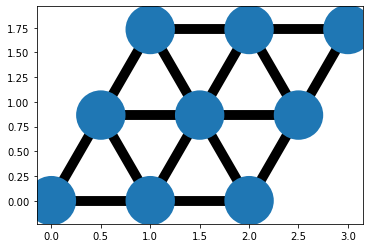

4.0 [0^ 0] +
-1.0 [0^ 1] +
-1.0 [0^ 3] +
-1.0 [1^ 0] +
4.0 [1^ 1] +
-1.0 [1^ 2] +
-1.0 [1^ 3] +
-1.0 [1^ 4] +
-1.0 [2^ 1] +
4.0 [2^ 2] +
-1.0 [2^ 4] +
-1.0 [2^ 5] +
-1.0 [3^ 0] +
-1.0 [3^ 1] +
4.0 [3^ 3] +
-1.0 [3^ 4] +
-1.0 [3^ 6] +
-1.0 [4^ 1] +
-1.0 [4^ 2] +
-1.0 [4^ 3] +
4.0 [4^ 4] +
-1.0 [4^ 5] +
-1.0 [4^ 6] +
-1.0 [4^ 7] +
-1.0 [5^ 2] +
-1.0 [5^ 4] +
4.0 [5^ 5] +
-1.0 [5^ 7] +
-1.0 [5^ 8] +
-1.0 [6^ 3] +
-1.0 [6^ 4] +
4.0 [6^ 6] +
-1.0 [6^ 7] +
-1.0 [7^ 4] +
-1.0 [7^ 5] +
-1.0 [7^ 6] +
4.0 [7^ 7] +
-1.0 [7^ 8] +
-1.0 [8^ 5] +
-1.0 [8^ 7] +
4.0 [8^ 8]


In [2]:
a = 1.
L = 3
t = 1.

syst = kwant.Builder()
lat = kwant.lattice.triangular(a)
syst[(lat(x, y) for x in range(L) for y in range(L))] = 4 * t
syst[lat.neighbors()] = -t

syst = syst.finalized()
kwant.plot(syst)

ham = system_to_FermionOperator(syst)
print(ham)

System with spin:

$$H=−\frac{\hbar^2}{2m}(\partial^2_x+\partial^2_y)−i\alpha(\partial_x\sigma_y−\partial_y\sigma_x)+E_Z\sigma_z$$

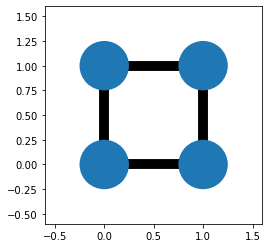

4.08 [0^ 0] +
(-1+0j) [0^ 2] +
0.25j [0^ 3] +
(-1+0j) [0^ 4] +
(-0.25+0j) [0^ 5] +
3.92 [1^ 1] +
0.25j [1^ 2] +
(-1+0j) [1^ 3] +
(0.25+0j) [1^ 4] +
(-1+0j) [1^ 5] +
(-1+0j) [2^ 0] +
-0.25j [2^ 1] +
4.08 [2^ 2] +
(-1+0j) [2^ 6] +
(-0.25+0j) [2^ 7] +
-0.25j [3^ 0] +
(-1+0j) [3^ 1] +
3.92 [3^ 3] +
(0.25+0j) [3^ 6] +
(-1+0j) [3^ 7] +
(-1+0j) [4^ 0] +
(0.25+0j) [4^ 1] +
4.08 [4^ 4] +
(-1+0j) [4^ 6] +
0.25j [4^ 7] +
(-0.25+0j) [5^ 0] +
(-1+0j) [5^ 1] +
3.92 [5^ 5] +
0.25j [5^ 6] +
(-1+0j) [5^ 7] +
(-1+0j) [6^ 2] +
(0.25+0j) [6^ 3] +
(-1+0j) [6^ 4] +
-0.25j [6^ 5] +
4.08 [6^ 6] +
(-0.25+0j) [7^ 2] +
(-1+0j) [7^ 3] +
-0.25j [7^ 4] +
(-1+0j) [7^ 5] +
3.92 [7^ 7]


In [3]:
t=1.0
alpha=0.5
e_z=0.08
L = 2

#Pauli matrices
import tinyarray
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])



# Start with an empty tight-binding system and a single square lattice.
# `a` is the lattice constant (by default set to 1 for simplicity).
lat = kwant.lattice.square()

syst = kwant.Builder()

#### Define the scattering region. ####
syst[(lat(x, y) for x in range(L) for y in range(L))] = \
    4 * t * sigma_0 + e_z * sigma_z
# hoppings in x-direction
syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = \
    -t * sigma_0 + 1j * alpha * sigma_y / 2
# hoppings in y-directions
syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = \
    -t * sigma_0 - 1j * alpha * sigma_x / 2

syst = syst.finalized()
kwant.plot(syst)

ham = system_to_FermionOperator(syst)
print(ham)

Multiatomic lattice:

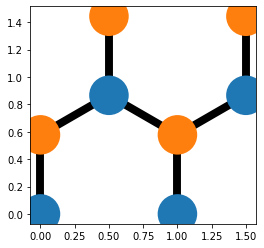

1.0 [0^ 0] +
-1.0 [0^ 4] +
1.0 [1^ 1] +
-1.0 [1^ 4] +
-1.0 [1^ 5] +
-1.0 [1^ 6] +
1.0 [2^ 2] +
-1.0 [2^ 6] +
1.0 [3^ 3] +
-1.0 [3^ 6] +
-1.0 [3^ 7] +
-1.0 [4^ 0] +
-1.0 [4^ 1] +
1.0 [4^ 4] +
-1.0 [5^ 1] +
1.0 [5^ 5] +
-1.0 [6^ 1] +
-1.0 [6^ 2] +
-1.0 [6^ 3] +
1.0 [6^ 6] +
-1.0 [7^ 3] +
1.0 [7^ 7]


In [4]:
L = 2
t = 1

lat = kwant.lattice.honeycomb()
syst = kwant.Builder()

for sublat in lat.sublattices:
    syst[(sublat(x,y) for x in range(L) for y in range(L))] = t
syst[lat.neighbors()] = -t

syst = syst.finalized()
kwant.plot(syst)

ham = system_to_FermionOperator(syst)
print(ham)